# <center>Linear regression</center>


## Linear regression with one variable

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Read text file containing Population and Profits data and view its head

In [2]:
df = pd.read_csv("ex1data1.txt", header=None)
headers = ['Population', 'Profit']
df.columns = headers
print(df.shape)
df.head()

(97, 2)


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


View the distribution of population vs profit using a scatter plot

Text(0, 0.5, 'Profit')

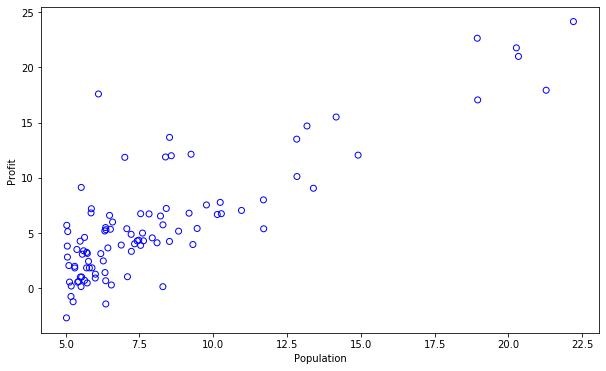

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(df['Population'], df['Profit'], marker='o', facecolors='none', edgecolors='b')
ax = plt.gca()
ax.set_xlabel('Population')
ax.set_ylabel('Profit')

### Fit a line using Linear Regression built-in model

Split data into training and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['Population']], df[['Profit']], test_size=0.45, random_state=0)

Initialize Linear Regression object, Train data to build a model and print the coefficients

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("y_pred = ", lr.coef_, "X_test +", lr.intercept_)

y_pred =  [[1.24241584]] X_test + [-4.05776436]


Predict output for test data

In [6]:
y_pred = lr.predict(X_test)

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.
There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
 - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
 - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
 - Root Mean Squared Error (RMSE).
 - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

Plot the training, test data and the fitted line

In [7]:
print("Linear Regression Score for training data:", lr.score(X_train, y_train))
print("Linear Regression Score for test data:", lr.score(X_test, y_test))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % metrics.r2_score(y_pred , y_test) )

Linear Regression Score for training data: 0.7630697164335629
Linear Regression Score for test data: 0.5134962602693296
Mean absolute error: 2.36
Residual sum of squares (MSE): 8.96
R2-score: 0.38


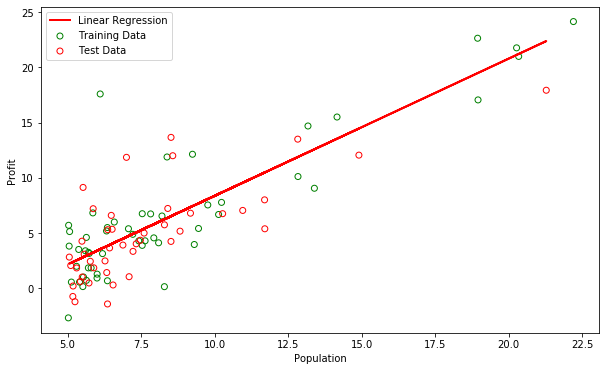

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, marker='o', facecolors='none', edgecolors='g', label="Training Data")
plt.scatter(X_test, y_test, marker='o', facecolors='none', edgecolors='r', label="Test Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Linear Regression")
ax = plt.gca()
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
plt.legend(loc="upper left")
plt.show()

### Fit a line using Gradient Descent

Objective is to minimize the cost function $$J( \theta )= \frac{1}{2m}\sum_{i=1}^m (h_ \theta (x^{(i)}) - y^{(i)})^2$$ where $$h_ \theta (x) = \theta^TX = \theta _0 + \theta _1x_1$$

Initialize $ \theta _0$ and $ \theta _1$ to some random values say 0, 0 and simultaneously update $\theta_j$ $$ \theta _j := \theta _j - \alpha \frac{1}{m}\sum_{i=1}^m (h_ \theta (x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [9]:
X = np.array(df['Population'])
y = np.array(df['Profit'])

# Original shape of data
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (97,)
Shape of y (97,)


We need to append a column of ones at the beginning of feature matrix to represent $\theta_0$. We also need to reshape the data from 1D to 2D form

In [10]:
numSamples = df['Population'].shape[0]
ones = np.ones(numSamples).reshape(numSamples, 1)
X = X.reshape(numSamples, 1)
X = np.hstack((ones, X))
y = y.reshape(numSamples, 1)
numFeatures = X.shape[1]

In [11]:
# Check the new shape
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (97, 2)
Shape of y (97, 1)


Function to calculate cost. This will be used to find minimum cost for different $\theta$ values

In [12]:
def computecost(X, y, theta):
    # Compute hypothesis
    yhat = X.dot(theta)
    
    # Compute error vector
    diff = yhat - y
    
    # Compute sum of squares of a vector by either squaring each element followed by summation, 
    # or by dot product the vector with its transpose. Both will give same results.
    # Here the latter approach is used.
    # squares = np.square(diff)
    # sumsquares = np.sum(squares)
    sumsquares = diff.T.dot(diff)
    
    # Finally compute cost by dividing the sum of squares by (2 * number of samples).
    cost = sumsquares/(2*X.shape[0])
    return cost

Example to calculate cost for (0, 0) values for $\theta$

In [13]:
theta = np.zeros((numFeatures, 1))
print(theta.shape)
computecost(X, y, theta)

(2, 1)


array([[32.07273388]])

Function to update $\theta$ values in each gradient descent iteration.
$$ \theta _j := \theta _j - \alpha \frac{1}{m}\sum_{i=1}^m (h_ \theta (x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [14]:
def updatetheta(X, y, theta, alpha):
    # Declare product vector of size (NumFeatures x 1)
    productArr = np.zeros((theta.shape[0], 1))
    
    # Compute hypothesis
    yhat = X.dot(theta)
    
    # Compute error vector
    diff = yhat-y
    
    # Update theta
    for j in range(numFeatures):
        # Get the vector array of jth feature
        xj = X[:,j]
        # Convert the 1D array data type of size (number of samples) into a 1D vector of dimension (number of samples x 1).
        xj = xj.reshape(X.shape[0], 1)
        # Compute product of error vector and the feature vector corresponding to the theta value being updated.
        productArr[j] = np.sum(diff*xj)
        # Adjust the product by alpha and m values
        productArr[j] = productArr[j]*alpha/X.shape[0]
        # Finally compute the updated theta value
        theta[j] = theta[j] - productArr[j]
    return theta

Calculate minimum cost for $\theta$ values by iteration. Initialize alpha to 0.01. We also store the updated theta values to later use for plotting.

In [15]:
iterations = 1500
alpha = 0.01
theta = np.zeros((numFeatures,1))
Theta_0 = np.zeros(iterations)
Theta_1 = np.zeros(iterations)
for i in range(0,iterations):
    Theta_0[i] = theta[0]
    Theta_1[i] = theta[1]
    theta = updatetheta(X, y, theta, alpha)
print("Final theta", theta)
cost = computecost(X, y, theta)
print("Final cost", cost)

Final theta [[-3.63029144]
 [ 1.16636235]]
Final cost [[4.48338826]]


#### Plot the actual data and data predicted using Gradient Descent

We need to convert the $\theta$ vectors to 2D shape using Numpy meshgrid as the matplotlib plot_surface API expects data in 2D format.

In [16]:
print(Theta_0.shape, Theta_1.shape)
Theta_0, Theta_1 = np.meshgrid(Theta_0, Theta_1)
print(Theta_0.shape, Theta_1.shape)

(1500,) (1500,)
(1500, 1500) (1500, 1500)


Create a table to store cost J($\theta$) values for all combination of $\theta$ values.

In [17]:
count = (iterations * iterations)
Z = np.zeros((iterations, iterations))
temp_theta = np.zeros((numFeatures, 1))
for i in range(0,iterations):
    for j in range(0,iterations):
        temp_theta[0] = Theta_0[i, j]
        temp_theta[1] = Theta_1[i, j]
        Z[i, j] = computecost(X, y, temp_theta)

Finally draw a 3D plot to view the gradient descent in action

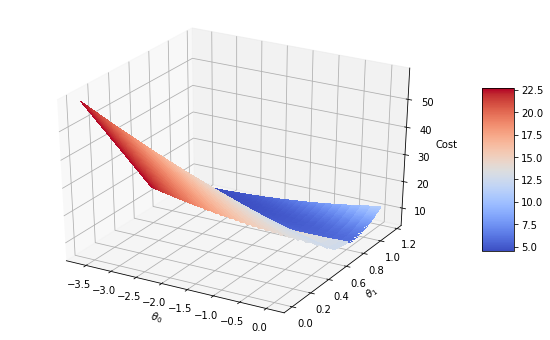

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Theta_0, Theta_1, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('Cost')
plt.show()

## Linear regression with multiple variable

Read text file containing Square Feet of house, Number of bedrooms and price of the house data and view its head

In [19]:
multidata_df = pd.read_csv('ex1data2.txt', names=['Sqft', 'Bedroom', 'Price'])
multidata_df.head()

,Sqft,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Lets visualize the data using 3D scatter plot.

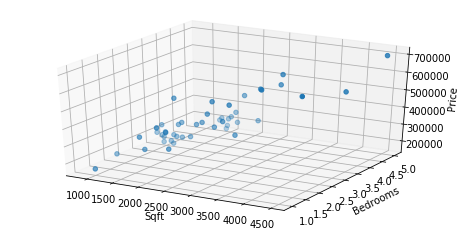

In [20]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(multidata_df['Sqft'], multidata_df['Bedroom'], multidata_df['Price'])
ax.set_xlabel('Sqft')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.show()

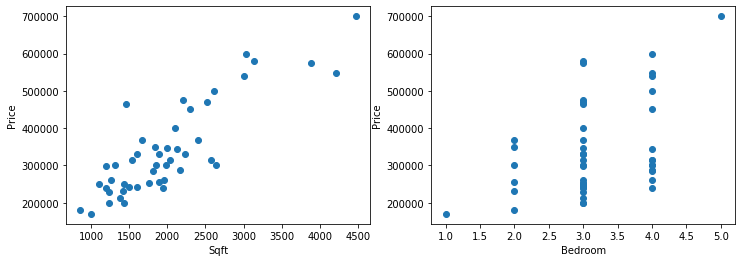

In [21]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(multidata_df['Sqft'], multidata_df['Price'])
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(multidata_df['Bedroom'], multidata_df['Price'])
ax2.set_xlabel('Bedroom')
ax2.set_ylabel('Price')
plt.show()

Look at data stats

In [22]:
multidata_df.describe()

,Sqft,Bedroom,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Lets normalize the data since the units of sqft and bedrooms differs widely. Subtract mean value for each column and divide by its standard deviation.

In [23]:
multidata_df['Sqft'] = (multidata_df['Sqft'] - multidata_df['Sqft'].mean())/multidata_df['Sqft'].std()
multidata_df['Bedroom'] = (multidata_df['Bedroom'] - multidata_df['Bedroom'].mean())/multidata_df['Bedroom'].std()
#multidata_df['Price'] = (multidata_df['Price'] - multidata_df['Price'].mean())/multidata_df['Price'].std()
multidata_df.head()

,Sqft,Bedroom,Price
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


### Fit a line using Linear Regression built-in model

In [24]:
lrm = LinearRegression()
X_mdata = multidata_df.drop('Price', axis=1)
y_mdata = multidata_df[['Price']]
print(X_mdata.shape, y_mdata.shape)

(47, 2) (47, 1)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(multidata_df[['Sqft', 'Bedroom']], y_mdata, test_size=0.33, random_state=0)
lrm.fit(X_train, y_train)
print("y_pred = ", lrm.coef_, "X_test +", lrm.intercept_)
y_pred = lrm.predict(X_test)

y_pred =  [[104136.06241335  -2454.16148159]] X_test + [339392.12834327]


In [26]:
print("Linear Regression Score for training data:", lrm.score(X_train, y_train))
print("Linear Regression Score for test data:", lrm.score(X_test, y_test))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % metrics.r2_score(y_pred , y_test) )

Linear Regression Score for training data: 0.7720082339939024
Linear Regression Score for test data: 0.6141963844632015
Mean absolute error: 61386.22
Residual sum of squares (MSE): 4942281186.80
R2-score: 0.10


### Fit a line using Gradient Descent

Objective is to minimize the cost function similar to single variable case

In [27]:
X = np.array(multidata_df[['Sqft', 'Bedroom']])
y = np.array(multidata_df[['Price']])

# Original shape of data
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (47, 2)
Shape of y (47, 1)


We need to append a column of ones at the beginning of feature matrix to represent $\theta_0$. We also need to reshape the data from 1D to 2D form

In [28]:
numSamples = X.shape[0]
ones = np.ones(numSamples).reshape(numSamples, 1)
X = np.hstack((ones, X))
numFeatures = X.shape[1]

In [29]:
# Check the new shape
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (47, 3)
Shape of y (47, 1)


We can use the same function to compute cost and update theta. Example to calculate cost for (0, 0) values for $\theta$

In [30]:
theta = np.zeros((numFeatures, 1))
computecost(X, y, theta)

array([[6.55915481e+10]])

Define a function to plot the cost vs number of iterations graph to illustrate the rate of reduction of cost with different values of $\alpha$

In [31]:
def plotcostvsalpha(xv, costv, alpha):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    label = "Alpha = {}".format(alpha)
    surf = ax.plot(xv, costv, label=label)
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('Cost J')
    plt.legend(loc="upper right")
    plt.show()

Calculate minimum cost for  𝜃  values by iteration. Initialize alpha to 0.01. We also store the updated theta values to later use for plotting.

In [32]:
def computemincost(alpha):
    iterations = 50
    theta = np.zeros((numFeatures, 1))
    xv = np.zeros(iterations)
    costv = np.zeros(iterations)
    for i in range(0,iterations):
        xv[i] = i
        costv[i] = computecost(X, y, theta)
        theta = updatetheta(X, y, theta, alpha)
    plotcostvsalpha(xv, costv, alpha)
    print("Final theta", theta)
    cost = computecost(X, y, theta)
    print("Final cost", cost)

The following interface allows you to experiment with different $\alpha$ values.

In [33]:
from ipywidgets import interact
interact(computemincost, alpha=(0.01, 1, 0.03))

interactive(children=(FloatSlider(value=0.49, description='alpha', max=1.0, min=0.01, step=0.03), Output()), _…

<function __main__.computemincost(alpha)>

### Finding $\theta$ values unsing Normal Equation

$$ \theta = (X^TX)^{-1}X^Ty $$

In [34]:
A = X.T.dot(X)
A_inv = np.linalg.inv(A)
B = A_inv.dot(X.T)
FinalTheta = B.dot(y)
print(FinalTheta)

[[340412.65957447]
 [110631.05027885]
 [ -6649.47427082]]
